In [2]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.random.seed(12345)
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
plt.rcParams["font.family"] = 'Malgun Gothic'


# 빅데이터 분석에 필요한 pandas의 데이터프레임의 반드시 알아야하는 핵심 기능
    * 데이터프레임 생성: pd.DataFrame(데이터셋) 함수를 사용하여 데이터프레임을 생성할 수 있다. 
    * 데이터프레임 인덱싱: loc 및 iloc 인덱서를 사용하여 데이터프레임의 특정 행과 열을 선택할 수 있다.
    * 데이터프레임 슬라이싱: 슬라이싱 연산자[start:end:step]를 사용하여 데이터프레임의 부분을 선택할 수 있다.
    * 데이터프레임 필터링: 불리언 마스크(조건식)를 사용하여 데이터프레임의 행과 열을 필터링할 수 있다.
    * 데이터프레임 정렬: sort_values()/sort_index() 메서드를 사용하여 데이터프레임을 열 또는 인덱스별로 정렬할 수 있다.
    * 데이터프레임 집계: groupby()  agg() / apply() 메서드를 사용하여 데이터프레임을 그룹화하고 집계 연산을 수행할 수 있다.
    * 데이터프레임 결측치/중복값 처리: dopna(),drop_duplicates(), fillna() 메서드를 사용하여 데이터프레임의 결측치를 채울 수 있다.
    * 데이터프레임 결합: merge() 또는 concat() 메서드를 사용하여 여러 데이터프레임을 결합할 수 있다.


## # 7장 데이터 정제 및 준비(Data Cleaning and Preparation)
* 7.1 누락된 데이터 처리하기
  * np.nan
  * None
  * isna() : 결측치에 대해 True 값으로 반환
  * dropna() : 결측치 제거하기
  * fillna() :결측값을 다른 값으로 채우는 데 사용


In [6]:
# ex : 다음 주어진 결측치을 담고 있는 데이터프레임에 대해 정제 작업하기

df = pd.DataFrame(np.random.standard_normal((7, 3))) #(행크기,열크기) -> 21개
# 결측치 추가
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan


#1. 결측치 확인 
df.isna()
#2. 결측치 제거 
filtered = df.dropna() #결측치를 포함한 행을 제거 
filtered

#2. 색인 재설정
filtered.reset_index(drop=True)

#3. 결측치를 평균값으로 채우기
#데이터셋의 대표값 : 평균 ,중앙값, 최대값,최소값 등 
df.fillna(df.mean())

,0,1,2
0,0.670216,0.139109,0.327985
1,-0.023493,0.139109,0.327985
2,-1.218302,0.139109,1.074623
3,0.723642,0.139109,1.001543
4,-0.503087,-0.622274,-0.921169
5,-0.726213,0.222896,0.051316
6,-1.157719,0.816707,0.433610


7.2 Transformation
* duplicated()
  * 데이터프레임의 중복된 행 또는 값은 True로 표시되고, 중복되지 않은 행 또는 값은 False로 표시    
* drop_duplicates()
  * 데이터프레임의 모든 열을 고려하여 중복된 행 또는 값을 제거
    * subset: 중복된 행 또는 값을 제거하는 데 사용할 열의 리스트
    * keep: 다음 값 중 하나.
      * first: 첫 번째 중복된 행 또는 값을 유지.
      * last: 마지막 중복된 행 또는 값을 유지
      * False: 모든 중복된 행 또는 값을 제거.
      * inplace: DataFrame을 변경할지 여부를 표시.

In [14]:
# ex 데이터프레임의 중복 데이터 제거하기 
# Dataframe with duplicated values 1. 범주형 데이터(object) 2. 수치 데이터(int64,float64)  
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 5, 5]})


print(data)

#1. 중복된 데이터 확인
data.duplicated() #기존: k1,k2 열 

#2. 중복된 행 제거하기
data.drop_duplicates(subset = ["k1","k2"],keep="first")

#3. "K1" 열을 기준으로 중복된 행을 필터링하기
data.drop_duplicates(subset=['k1'],keep="last")

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   5
6  two   5


,k1,k2
4,one,3
6,two,5


## 문제: 주어진 데이터셋를 정제하고 준비하여 다음 데이터 분석을 수행하시오.
* 데이터셋:


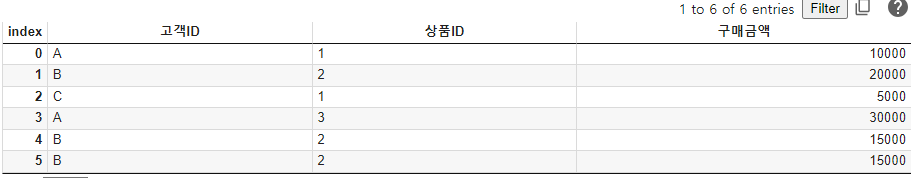
  * 고객별 구매 금액 합계
  * 상품별 구매 금액 합계
  * 고객별로 가장 많이 구매한 상품

In [15]:
# 데이터셋 (json 포맷)
data = [
  {"customer_id": "A", "product_id": "1", "amount": 10000},
  {"customer_id": "B", "product_id": "2", "amount": 20000},
  {"customer_id": "C", "product_id": "1", "amount": 5000},
  {"customer_id": "A", "product_id": "3", "amount": 30000},
  {"customer_id": "B", "product_id": "2", "amount": 15000},
  {"customer_id": "B", "product_id": "2", "amount": 15000}
]

In [21]:
import pandas as pd 
# 데이터프레임 탐색하기
# 1) 주어진 데이터셋을 데이터프레임으로 변환하기
df = pd.DataFrame(data)

# 2) 데이터프레임을 첫 행부터 3번째 행까지 슬라이싱하기
df.head(3)


# 3)데이터프레임의 열 레이블 변경하기
df.rename(columns={"customer_id":"고객ID","product_id":"상품ID","amount":"구매금액"},inplace=True)
df

,고객ID,상품ID,구매금액
0,A,1,10000
1,B,2,20000
2,C,1,5000
3,A,3,30000
4,B,2,15000
5,B,2,15000


In [26]:
# 데이터프레임 정제하기
# 1) 결측치 데이터 확인하기
df.isna()

# 2) 중복 데이터 확인하기
#df.duplicated(subset=["고객ID","상품ID","구매금액"],keep="first")
df.duplicated()
# 3) 중복 데이터 제거
df.drop_duplicates(subset=["고객ID","상품ID","구매금액"],keep="first")

,고객ID,상품ID,구매금액
0,A,1,10000
1,B,2,20000
2,C,1,5000
3,A,3,30000
4,B,2,15000


In [29]:
# 데이터프레임 정렬하기
# 1) 고객ID 와 상품ID의 값을 기준으로 데이터프레임의 행을 내림차순으로 정렬하기 : sort_values()
df = df.sort_values(by = ["고객ID","상품ID"],ascending = False)
df


# 2) 데이터프레임의 기존의 인덱스을 변경 또는 재설정하기
df = df.reset_index(drop = True)
df

,고객ID,상품ID,구매금액
0,C,1,5000
1,B,2,20000
2,B,2,15000
3,B,2,15000
4,A,3,30000
5,A,1,10000


In [ ]:
# 데이터분석하기
# 1) 고객별 구매 금액 합계를 계산하기


In [ ]:
# 2) 상품별 구매 금액 합계를 계산하기


In [ ]:
# 3) 상위 최우수 고객 2명 필터링하기


In [ ]:
# 4) 고객에서 가장 인기있는 상품 찾기


In [ ]:
# 5) 고객ID별 구매금액의 평균를 계산하고 시각화하기



In [ ]:
# 6) 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 합계를 계산하고 시각화하기



# 8장 다중색인(mutiIndex)
* 다중색인(multi-index)은 데이터프레임이나 시리즈의 인덱스를 여러 열로 구성하는 것
* 다중색인 사용
  * 데이터를 여러 기준으로 그룹화
  * 데이터를 여러 기준으로 검색


In [35]:
# case1>
# 1. 단일 색인-> 다중색인 생성

# 1) 단일 데이터프레임 생성
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})


# 2) 다중 색인으로 사용할 튜플 리스트
index = [('X', 1), ('X', 2), ('Y', 1)]

# 3) 다중색인 설정
mindex = pd.MultiIndex.from_tuples(index)

#print(df.index)

# # 4) 주어진 단일 데이터프레임에 다중 인덱스 적용  
df.index = mindex
df
#2.다중색인 사용
#1) 데이터프레임을 계층적 색인의 첫 번째 인덱스 레벨을 기준으로 그룹화하기
grouped = df.groupby(level = 0)

# 2)각 그룹에 대한 정보 출력하기
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()

Group: X
     A  B
X 1  1  4
  2  2  5

Group: Y
     A  B
Y 1  3  6



In [36]:
# case2> 
import pandas as pd

# 다중 인덱스를 가진 데이터프레임 생성
arrays = [['A', 'A', 'B', 'B'], [1, 2, 1, 2]]
index = pd.MultiIndex.from_arrays(arrays, names=('first', 'second'))
df = pd.DataFrame({'data': [1, 2, 3, 4]}, index=index)

# 첫 번째 인덱스 수준을 기준으로 그룹화
grouped = df.groupby(level=0)

# 각 그룹에 대한 정보 출력
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()


Group: A
              data
first second      
A     1          1
      2          2

Group: B
              data
first second      
B     1          3
      2          4



In [39]:
# case3
# 1. 다중 색인 생성
# 단일 데이터프레임 
df = pd.DataFrame({
    "data": [1, 2, 3, 4],
    "index1": ["A", "A", "B", "B"],
    "index2": [1, 2, 1, 2],
})
# 다중 색인을 가진 데이터프레임 
df = df.set_index(["index1", "index2"])


# 2.다중 색인 사용
# 1)각 그룹에 대한 정보 출력
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()


Group: A
              data
first second      
A     1          1
      2          2

Group: B
              data
first second      
B     1          3
      2          4



In [41]:
# 2) 데이터셋 슬라이싱 :

df.loc["A", 1] # 레벨 1에서 "A" 선택, 레벨 2에서 1 선택

df.loc["B", :] # 레벨 1에서 "B" 선택, 레벨 2에서 모든 값 선택

df.loc[[('A', 1),('B',1)]] # 레벨 0에서 "A"와 "B" 선택, 레벨 1에서 1 선택

,,data
index1,index2,
A,1,1
B,1,3


### [문제]: 다음 DataFrame에서 고객ID와 상품ID를 기준으로 다중색인을 만들고, 각 그룹의 구매금액의 합계를 계산하세요.

In [46]:
import pandas as pd
# 데이터셋
data = [
  {"고객ID": "A", "상품ID": "1", "구매금액": 10000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 20000},
  {"고객ID": "C", "상품ID": "1", "구매금액": 5000},
  {"고객ID": "A", "상품ID": "3", "구매금액": 30000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000}
]

# 1. 데이터프레임 생성
df = pd.DataFrame(data)

# 2. 고객ID와 상품ID을 기준으로 다중색인을 생성하여 데이터프레임을 생성하기
df = df.set_index(["고객ID","상품ID"])

#3. 데이터프레임의 다중색인을 출력하기
df.index 

MultiIndex([('A', '1'),
            ('B', '2'),
            ('C', '1'),
            ('A', '3'),
            ('B', '2'),
            ('B', '2')],
           names=['고객ID', '상품ID'])

In [ ]:
# 4. 고객을 기준으로 묶어서 구매금액의 합을 계산하시오.


# 5. 상품을 기준으로 묶어서 구매금액의 합을 계산하시오.

# 6. 결과를 출력하시오.


# 9.2장. plotting with pandas, matplolib and seabor
* Bar 막대그래프
  * 막대 그래프는 범주형 데이터의 빈도, 비율 또는 백분율을 시각화하는 데 효과적
     * 빈도 분포 표시: 범주별 빈도를 시각적으로 비교할 수 있다.
     * ex. 각각의 막대가 특정 항목의 빈도를 나타내며, 막대의 높이는 해당 항목의 빈도에 비례
     * 비율 또는 백분율 표시: 범주별로 전체의 비율 또는 백분율을 표시
     * 이것은 각 범주의 중요성이나 상대적인 크기를 비교하는 데 도움
     * 시계열 데이터 표시: 시간에 따른 변화를 보여줄 때 유용
     * 각 시점 또는 기간에 대한 데이터를 각각의 막대로 나타낼 수 있다.
     * 다중 변수의 비교: 여러 범주에 대한 여러 그룹 간의 비교를 수행 사용
     * 이를 통해 각 그룹 간의 차이을 직관적으로 이해할 수 있다.

* Bar Plots


              A         B         C         D
one    0.647362  0.581619  0.711116  0.252417
two    0.900160  0.442294  0.020521  0.959661
three  0.652225  0.513206  0.682356  0.489540
four   0.926490  0.515880  0.072160  0.567508
five   0.615243  0.941546  0.415363  0.264440
six    0.097393  0.485844  0.464663  0.029759


<Axes: >

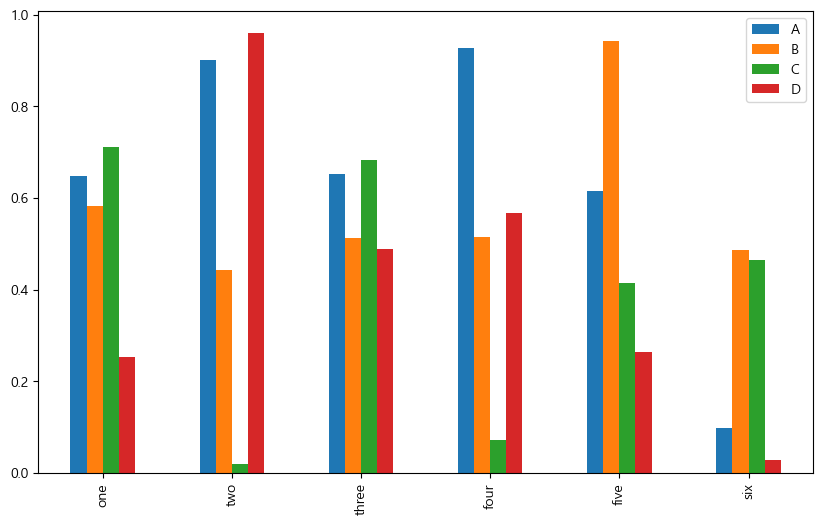

In [47]:
# ex bar plot 사용법 
#1. DataSet
df = pd.DataFrame(np.random.uniform(size=(6,4)), #24 데이터 
                  index = ["one", "two", "three", "four", "five", "six"],
                  columns = ["A","B", "C", "D"])
print(df)
# 그래프 그리기 
df.plot.bar()

## [예제]
* 'examples/tips.csv'을 로딩하여 'day'별에 따라 'size' 인원별 팁의 백분율을 보여주는 쌓인 막대 그래프를 그리기

<Axes: xlabel='tip_pct', ylabel='day'>

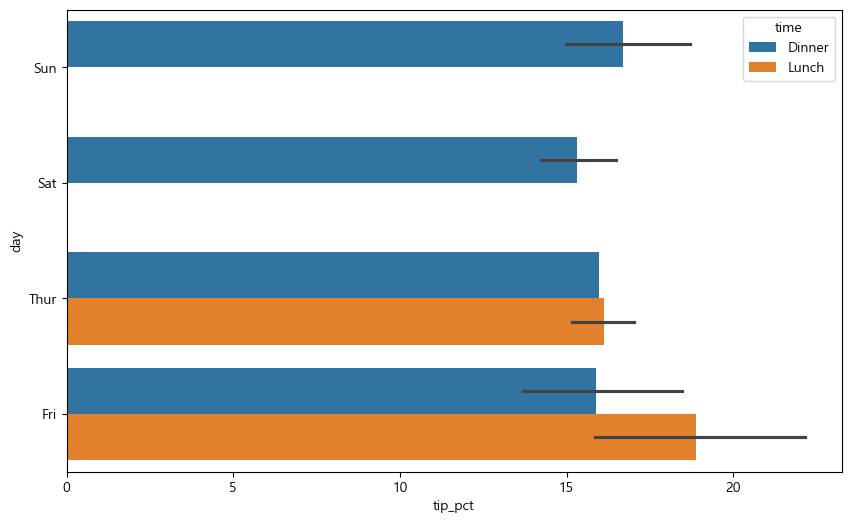

In [50]:
# 1. Load a dataset
tips = pd.read_csv('examples/tips.csv')

# 2. 데이터프레임 생성: 빈도수 표 만들기
party_counts = pd.crosstab(tips["day"], tips['size'])


#3. 인덱스 재설정
party_counts = party_counts.reindex(index = ["Thur","Fri","Sat","Sun"])


## 3. 필터링 - 불필요한 데이터 삭제 
party_counts = party_counts.loc[:,2:5] #기말에도 나옴 


# 4. 데이터 정규화 작업: 데이터 -> 비율로 계산
party_pcts = party_counts.div(party_counts.sum(axis = "columns"),
                              axis = "index")


# 5. 막대그래프로 그리기
#party_pcts.plot.bar(stacked=True)

# 6. 팁의 배분율 열 추가하기
# 팁의 비율 계산 
tips["tip_pct"] = tips['tip'] / (tips['total_bill']) * 100
sns.barplot(x = "tip_pct", y='day', data=tips, orient='h', hue='time')

## [문제] 다음 주어진 데이터셋에서 다음 작업을 수행하시오.
  * 나이가 30세 이상인 사람들의 이름을 출력하기
  * 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기
  * 이름이 'Bob'인 사람의 도시를 출력하기

In [ ]:
# dataset
data = {
    'Name': ['John', 'Mary', 'Bob', 'Alice', 'Tom'],
    'Age': [20, 25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Dallas']
}

In [ ]:
# 1. 나이가 30세 이상인 사람들의 이름 출력하기



In [ ]:
# 2. 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기



In [ ]:
# 3. 이름이 'Bob'인 사람의 도시를 출력하기



# 10장 데이터 집계와 그룹 연산 (!!!!)
* 하나 이상의 키(함수, 배열, 데이터프레임의 열 이름)를 이용해서 판다스 객체를 여러 조각(그룹)으로 나누는 방법
* 합계, 평균, 표준편차, 사용자 정의 함수 같은 그룹 요약 통계를 계산하는 방법
* 정규화, 선형 회귀, 순위 또는 부분집합 선택 같은 그룹 내 변형이나 다른 조작을 적용하는 방법




* groupby() 연산에 대한 원리
    * 분리-적용-결합(split-apply-combine)
    * Aggregations refer to any data transformation that produces scalar values from arrays. 

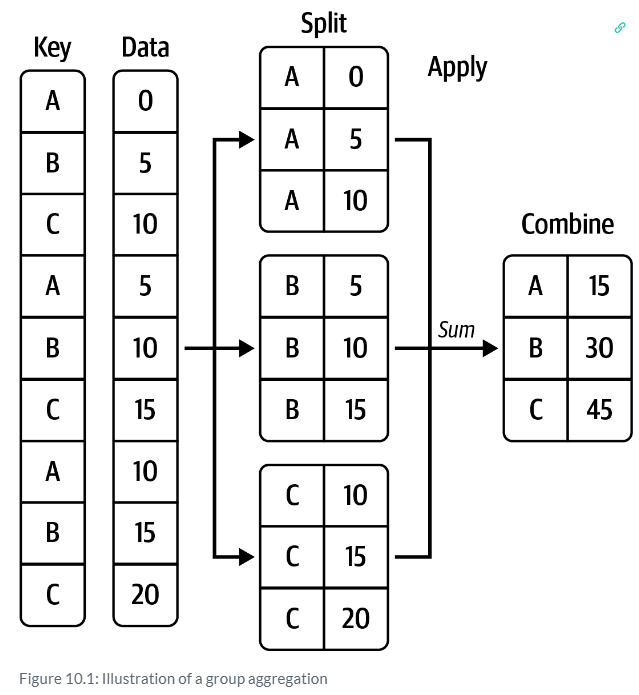

### [예제] 주어진 데이터를 key1으로 묶고 각 그룹에서 data1의 평균을 구하기

In [51]:
# 데이터셋
dataset = {"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1],
                                      dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)}
df = pd.DataFrame(dataset)
df

,key1,key2,data1,data2
0,a,1,1.095390,-1.569271
1,a,2,0.980928,-1.022487
2,None,1,-0.589488,-0.402827
3,b,2,1.581700,0.220487
4,b,1,-0.528735,-0.193401
5,a,<NA>,0.457002,0.669158
6,None,1,0.929969,-1.648985


In [52]:
# mean() - 주어진 데이터을 컬럼을 사용하여 각 그룹으로 묶어 평균 집계 
## 그룹 색인에서 누락된 값은 기본적으로 결과에서 제외됨

df.groupby("key1").mean()

df.groupby("key2").mean(numeric_only=True) # key1열이 결과에서 빠짐: df['key1']은 숫자 데이터가 아님

df.groupby(["key1", "key2"]).mean()

# 특히 대용량 데이터셋을 다룰 때 소수의 열(data2)만 집계(평균)하기
df.groupby(["key1", "key2"])[["data2"]].mean()

data2
key1 key2          
a    1    -1.569271
     2    -1.022487
b    1    -0.193401
     2     0.220487

## 예제: 10.2.1 열에 여러 가지 함수 적용하기
* Column-Wise and Multiple Function Application


In [ ]:
# 데이터셋 가져오기
tips = pd.read_csv("examples/tips.csv")
tips.head()

In [ ]:
# total_bill에서 팁의 비율을 tip_pct 열에 출가하기
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips.head()

* agg()
  * 데이터프레임의 모든 열을 집계하려면 mean이나 std 같은 메서드를 호출하거나 agg를 통해 원하는 함수를 사용
  * 열에 따라 다른 함수를 사용해서 집계를 수행하거나 여러 개의 함수를 한 번에 적용하기

In [ ]:
# ex1
grouped = tips.groupby(["day", "smoker"])
grouped_pct = grouped["tip_pct"]
grouped_pct.agg("mean") # 기술 통계에서는 함수 이름을 문자열로 넘기기

In [ ]:
# ex2
grouped_pct.agg(["mean", "std"])  #함수 이름을 열 이름으로 하는 데이터프레임을 얻는다.

In [ ]:
# ex3 데이터프레임은 열마다 다른 함수를 적용하거나 여러 개의 함수를 모든 열에 적용하기
functions = ["count", "mean", "max"]
result = grouped[["tip_pct", "total_bill"]].agg(functions)  # 데이터프레임은 계층적인 열로 구성
result

## # 10.2.2 색인되지 않은 형태로 집계된 데이터 반환하기
* 집계된 데이터는 유일한 그룹 키 조합으로 (어떤 경우에는 계층적 색인)되어 반환되었다.
* groupby메서드에 as_index=False를 넘겨서 색인 작업을 비활성화

In [ ]:
grouped = tips.groupby(["day", "smoker"], as_index=False)
grouped.mean(numeric_only=True)

## # 10.3 apply 메서드 : 일반적인 분리-적용-병합
* apply() 메서드는 groupby 메서드의 가장 일반적인 메서드
* apply 메서드는 객체를 여러 조각으로 나누고, 전달된 함수를 각 조각에 일괄적으로 적용한 후 이를 다시 합친다.

In [ ]:
# 특정 열에서 가장 큰 값을 갖는 행을 선택하는 함수 정의
def top(df, n=5, column="tip_pct"):
    return df.sort_values(column, ascending=False)[:n]
top(tips, n=6)

In [ ]:
tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")

In [ ]:
result = tips.groupby("smoker")["tip_pct"].describe()
result

In [ ]:
result.unstack("smoker")


## [문제] 
* 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 평균을 계산하고, 그 결과를 상품ID순으로 출력하세요.

In [ ]:
df = pd.DataFrame({
    "고객ID": [1, 2, 1, 3, 2, 3],
    "상품ID": [101, 102, 103, 101, 103, 102],
    "구매금액": [10000, 20000, 30000, 40000, 50000, 60000]
})

# 고객ID와 상품ID을 기준으로 그룹화하여 구매금액의 평균을 계산
average_spent_by_customer_product = df.groupby(["고객ID", "상품ID"])["구매금액"].mean()

# 상품ID을 기준으로 정렬하기
average_spent_by_customer_product = average_spent_by_customer_product.sort_index(level = "상품ID")
print(average_spent_by_customer_product)

# 막대그래프로 시각화하기
average_spent_by_customer_product.plot.bar()


# 그래프 부가 정보 추가하기
plt.title("Average Purchase Amount by Product ID")
plt.xlabel("Product ID")
plt.ylabel("Average Purchase Amount")
plt.show()